# Using Stanford Health Care & Stanford School of Medicine's Secure GPT-4o for Video Understanding
### Last Updated: March 28, 2025
#### Hee Jung Choi

This notebook guides you through the basics of using Stanford Medicine's Secure GPT-4o for video understanding. This guide demonstrates how to securely work with a locally saved video by encoding it into a Base64 data URL. This approach ensures HIPAA compliance by keeping all data processing local before interacting with Stanford's Secure GPT-4o. If you're not connected to Stanford's network, and you're off campus, make sure your Stanford VPN is turned on.

## Test Connection

In [ ]:
import requests
import json

# Check with SHC to make sure this is the latest URL!
url = "https://apim.stanfordhealthcare.org/openai12/deployments/gpt-4o/chat/completions?api-version=2023-05-15"  

payload = json.dumps({
    "model": "gpt-4o",
    "messages": [
        {
            "role": "user",
            "content": "Hi! I'm excited to work with you to analyze videos. What about you?"
        }
    ]
})

headers = {
    "Ocp-Apim-Subscription-Key": "XXX",  # Subscription key
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=payload)
data = json.loads(response.text)

message_content = data["choices"][0]["message"]["content"]
print(message_content)

Hello! I'm excited to help you analyze videos. Whether you need assistance with video content analysis, extracting insights, or any other type of video-related project, feel free to let me know how I can assist you.


## Load a Video

In [7]:
from IPython.display import display, Image
import cv2  
import base64
import time

In [12]:
# Read a video and check the number of frames read
video = cv2.VideoCapture("./sample_TUG_video.mp4")  # Your video file path

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    # frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)  # Add this only if you need to rotate the video to a desired orientation
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

1224 frames read.


Sample Video Source:

Colón-Emeric CS, McDermott CL, Lee DS, Berry SD. Risk Assessment and Prevention of Falls in Older Community-Dwelling Adults: A Review. JAMA. 2024;331(16):1397–1406. doi:10.1001/jama.2024.1416



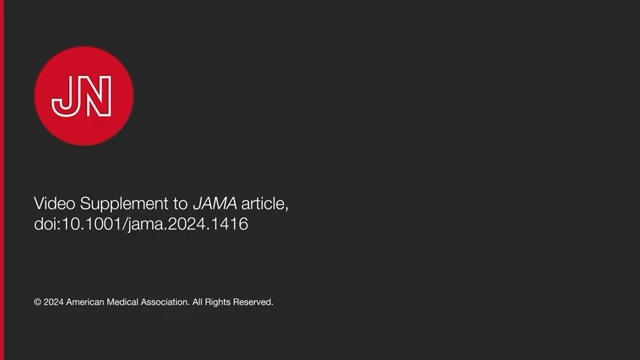

In [14]:
# Display the frames to make sure we've read them in correctly:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

# Send the downsampled frames and ask GPT-4o for a description!

In [15]:
# Convert frames to OpenAI-compatible image objects
images = [
    {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{x}",
            "detail": "auto"
        }
    }
    for x in base64Frames[0::50]
]

# The prompt and the video frames!
content = [{"type": "text", "text": "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video."}] + images

payload = json.dumps({
    "model": "gpt-4o",
    "messages": [
        {
            "role": "user",
            "content": content
        }
    ]
})

response = requests.post(url, headers=headers, data=payload)

data = json.loads(response.text)
if "choices" in data:
    print(data["choices"][0]["message"]["content"])
else:
    print("Error:", data.get("error", data))

This video demonstrates the correct procedure for administering the Timed Up and Go test, a simple test used by medical professionals to assess an individual’s risk of falling. It includes detailed instructions and visuals, guiding viewers step-by-step on how to properly execute the test. Key aspects such as the proper distance of the cone, timing considerations, and the expected performance standards are covered to ensure accurate assessments. This serves as an essential tool for clinicians to help prevent falls and improve patient safety.
